# 基本使用
openai风格api
```python
import os
from openai import OpenAI

client = OpenAI(
    # 若没有配置环境变量，请用百炼API Key将下行替换为：api_key="sk-xxx",
    api_key=os.getenv("DASHSCOPE_API_KEY"), 
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)
completion = client.chat.completions.create(
    model="qwen-plus", # 此处以qwen-plus为例，可按需更换模型名称。模型列表：https://help.aliyun.com/zh/model-studio/getting-started/models
    messages=[
        {'role': 'system', 'content': 'You are a helpful assistant.'},
        {'role': 'user', 'content': '你是谁？'}],
    )
    
print(completion.model_dump_json())
```

In [ ]:
%pip install -U langchain-core langchain langchain-community langchain-openai

# 向量库
%pip install chromadb faiss-cpu

### 创建模型并使用
#### langchain-openai风格的api调用

In [2]:
import os
# from dotenv import load_dotenv
# # 加载环境变量
# load_dotenv()  

### 设置环境
os.environ["OPENAI_API_KEY"] =  'sk-ec9abbcb64d241998f27e89b452dceb4' # 阿里云Qwen密钥
os.environ["OPENAI_BASE_URL"] = 'https://dashscope.aliyuncs.com/compatible-mode/v1'   # 例如：https://dashscope.aliyuncs.com/compatible-mode/v1

In [3]:
from langchain_openai import ChatOpenAI

# 初始化大模型
llm = ChatOpenAI(
    # model=os.getenv('DEEPSEEK_MODEL'),
    # api_key=os.getenv('DEEPSEEK_API_KEY'),
    # base_url=os.getenv('DEEPSEEK_URL')
    model = "qwen-plus",
    api_key =  os.getenv('OPENAI_API_KEY'),
    base_url = os.getenv('OPENAI_BASE_URL')
)

   ---------------------------------------- 0.0/1.0 MB ? eta -:--:--
   ------------------------------- -------- 0.8/1.0 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------- 1.0/1.0 MB 4.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.5 MB ? eta -:--:--
   -------------------- ------------------- 1.3/2.5 MB 6.7 MB/s eta 0:00:01
   ---------------------------------------- 2.5/2.5 MB 8.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.49
    Uninstalling langchain-core-0.3.49:
      Successfully uninstalled langchain-core-0.3.49
  Attempting uninstall: langchain-text-splitters
    Found existing installation: langchain-text-splitters 0.3.7
    Uninstalling langchain-text-splitters-0.3.7:
      Successfully uninstalled langchain-text-splitters-0.3.7
  Attempting uninstall: langchain-openai
    Found existing installation: langchain-openai 0.3.11
    Uninstalling langchain-openai-0.3.11:
      S

**这段代码使用了LangChain的LCEL（LangChain Expression Language）语法构建了一个处理链。**
在LCEL中，| 符号表示管道操作符，将前一步的输出作为后一步的输入

In [7]:
# 管道式语法构建工作流
from langchain_core.prompts import ChatPromptTemplate

chain = (
    ChatPromptTemplate.from_template("用比喻解释{term}的概念：") 
    | llm 
    | (lambda x: x.content)  # 提取文本
)
print(chain.invoke({"term": "机器学习"}))

好的！我们可以用一个比喻来解释机器学习的概念：**“机器学习就像教小孩辨认苹果和橙子。”**

想象一下，你正在教一个小孩子如何区分苹果和橙子。你会怎么做呢？

1. **提供样本（训练数据）：**  
   你不会直接告诉孩子苹果是什么、橙子是什么，而是拿出一堆苹果和橙子，一个个指给他看：“这是苹果，它是红色的，光滑的；这是橙子，它是橙色的，表面有点粗糙。”

   类比到机器学习中，这些苹果和橙子就是“数据”，而你指着它们告诉孩子它们的名字，这就是“标注数据”。机器学习模型通过这些数据来学习规律。

2. **总结规律（训练模型）：**  
   孩子看了很多苹果和橙子之后，开始在脑海中形成一些规则，比如“红色、光滑的是苹果；橙色、粗糙的是橙子”。虽然他可能无法用语言准确描述这些规则，但他已经开始学会分辨了。

   在机器学习中，模型会从数据中提取特征并总结规律。比如，算法可能会发现苹果的颜色更红，橙子的颜色更黄，或者苹果的形状更圆润等。

3. **测试能力（验证模型）：**  
   当你觉得孩子已经学会了，你可能会拿出一个新的水果让他辨认：“这个是什么？”如果他说对了，说明他已经掌握了如何区分苹果和橙子的能力。

   在机器学习中，这一步叫做“测试集评估”。我们用之前没见过的数据来检验模型是否真正学会了规律，而不是仅仅记住了之前的样本。

4. **应用知识（部署模型）：**  
   最后，当孩子完全学会了如何分辨苹果和橙子，你可以放心地让他去超市挑选水果。无论遇到什么样的苹果或橙子，他都能正确判断。

   同样地，机器学习模型在经过充分训练和验证后，可以被用来解决实际问题，比如分类、预测或生成新内容。

---

### 总结：
机器学习的核心就是让计算机像小孩子一样，通过观察大量例子（数据），总结出某种规律（模型），然后用这种规律去处理新的情况（预测）。这种方法不需要人类明确地编写每一条规则，而是让机器自己从数据中“学习”出来。

希望这个比喻能帮助你更好地理解机器学习的概念！ 😊


In [ ]:
response = llm.invoke("解释量子纠缠")
print(response.content)

量子纠缠是一种奇特的量子现象，它描述了一种特殊的状态，在这种状态下，两个或多个粒子之间存在一种深刻的关联，即使它们相隔很远。这种关联使得对一个粒子的测量结果会立即影响到另一个粒子的状态，无论它们之间的距离有多远。

### 1. **什么是量子纠缠？**
量子纠缠发生在两个或多个粒子（如光子、电子等）在相互作用后形成的一种状态中。在这种状态下，单个粒子的状态无法被独立描述，而只能通过整个系统的波函数来描述。换句话说，纠缠态中的粒子是“绑定”在一起的，它们的状态是高度相关的。

例如，假设我们有两个纠缠的粒子 A 和 B，它们的一个属性（如自旋）处于叠加态。如果我们测量粒子 A 的自旋为“向上”，那么粒子 B 的自旋会立即变为“向下”（假设它们的总自旋守恒）。这种关联不受距离限制，即使 A 和 B 相隔数光年。

---

### 2. **纠缠的本质：非局域性**
量子纠缠的核心特征之一是非局域性（non-locality），即纠缠粒子之间的关联似乎超越了空间和时间的限制。爱因斯坦曾将这一现象称为“幽灵般的超距作用”（spooky action at a distance），因为他认为这种现象违反了经典物理中的因果律和局域性原则。

然而，量子力学的实验结果表明，纠缠确实存在，并且符合量子理论的预测。尽管如此，纠缠并不允许信息以超光速传递，因为单独测量一个粒子的结果仍然是随机的，只有通过比较多个测量结果才能揭示纠缠的存在。

---

### 3. **如何产生量子纠缠？**
量子纠缠可以通过多种方式产生，例如：
- **自发参量下转换**：在非线性晶体中，一个高能光子可以分裂成两个低能光子，这两个光子通常处于纠缠态。
- **量子点**：通过操控半导体中的电子，可以生成纠缠的电子对。
- **超导量子比特**：在量子计算中，超导电路可以用来生成纠缠态。

---

### 4. **量子纠缠的应用**
量子纠缠不仅是基础物理研究的重要课题，还具有广泛的实际应用：
- **量子通信**：利用纠缠态可以实现量子密钥分发（QKD），从而构建理论上不可破解的加密系统。
- **量子计算**：纠缠是量子计算机中实现量子并行性和量子加速的关键资源。
- **量子 teleportation**：通过纠缠，可以将一个粒子的状态“传送”到另一个粒子上，而无需实际传输粒子本身。
-

#### 调用自定义工具

In [7]:
import json
from langchain_core.tools import tool

# 自定义工具定义
@tool
def get_weather(city: str) -> str:
    """根据城市名称查询天气"""
    return f"{city}天气晴朗"

# 绑定工具到模型
llm_with_tools = llm.bind_tools([get_weather])

# 触发工具调用
response = llm_with_tools.invoke("北京今天适合户外活动吗？输出是或者否")
print(response)
print("\n=================================\n")
if tool_calls := response.additional_kwargs.get("tool_calls"):
    tool_name = tool_calls[0]["function"]["name"]
    args = tool_calls[0]["function"]["arguments"]
    print(f"调用工具：{tool_name}, 参数：{args}")

    #手动执行工具获取天气结果，从query中得到的参数args是字符串JSON格式
    args =  json.loads(args)
    weather_result = get_weather(args["city"])  # 例如返回 "北京天气晴朗"
    # 将结果重新传递给模型生成最终回答
    final_response = llm.invoke(f"根据天气信息回答问题：{weather_result}，北京今天适合户外活动吗？")
    print(final_response.content)  # 输出 "是"

content='' additional_kwargs={'tool_calls': [{'id': 'call_4d4e2b6408854c848f56c2', 'function': {'arguments': '{"city": "北京"}', 'name': 'get_weather'}, 'type': 'function', 'index': 0}], 'refusal': None} response_metadata={'token_usage': {'completion_tokens': 17, 'prompt_tokens': 171, 'total_tokens': 188, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'qwen-plus', 'system_fingerprint': None, 'id': 'chatcmpl-2d148f58-b95a-9270-a50e-d4dcb7f21ee6', 'finish_reason': 'tool_calls', 'logprobs': None} id='run-89d0481c-191c-4219-9153-b1532674e46b-0' tool_calls=[{'name': 'get_weather', 'args': {'city': '北京'}, 'id': 'call_4d4e2b6408854c848f56c2', 'type': 'tool_call'}] usage_metadata={'input_tokens': 171, 'output_tokens': 17, 'total_tokens': 188, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}


调用工具：get_weather, 参数：{"city": "北京"}


C:\Users\mix\AppData\Local\Temp\ipykernel_24896\749951932.py:24: LangChainDeprecationWarning: The method `BaseTool.__call__` was deprecated in langchain-core 0.1.47 and will be removed in 1.0. Use :meth:`~invoke` instead.
  weather_result = get_weather(args["city"])  # 例如返回 "北京天气晴朗"


根据提供的信息，北京天气晴朗。一般来说，晴朗的天气适合进行户外活动，因为阳光充足、能见度高，气温通常也比较舒适。

因此，**北京今天适合户外活动**。不过，为了更全面地判断，建议您还关注以下几点：
1. **空气质量**：查看PM2.5和AQI指数，确保空气适合长时间户外活动。
2. **温度和风速**：如果气温过高或过低，或者风速较大，可能会影响舒适度。
3. **紫外线强度**：晴天时紫外线可能较强，注意防晒。

综合来看，如果没有其他不利因素，北京今天是适合户外活动的！


1. Jupyter 内核（尤其是 IPython 内核）默认启用了异步支持，可能已存在一个全局事件循环。当你在 Notebook 中直接运行 asyncio.run() 时，会尝试在已有循环上叠加新循环，触发冲突。直接使用await即可。
2. 在使用上述工具时，传入的参数是'arguments': '{"city": "北京"}'，未输出content,手动调用可行

In [ ]:
response = await llm_with_tools.ainvoke("北京今天适合户外活动吗？")
print(response.content)
print("==========================")

#### rag知识库问答

[嵌入模型加载详情可见](https://python.langchain.com.cn/docs/modules/data_connection/text_embedding/)
需要对应的大模型支持的嵌入模型,比如默认embedding=OpenAIEmbeddings(),但是通义千问并不支持，所以需要替换。

In [19]:
# 加载文本嵌入模型
from langchain.embeddings import DashScopeEmbeddings
embeddings = DashScopeEmbeddings(
    model="text-embedding-v1", dashscope_api_key=os.getenv("OPENAI_API_KEY")
)

In [ ]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough

# 文档加载与向量化
loader = WebBaseLoader("https://help.aliyun.com/zh/beebot/",  header_template={"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36"})
webstr ='''
网页中介绍：智能对话机器人（Intelligent Robot）是一款基于自然语言处理（NLP）和人工智能（AI）技术，面向开发者提供智能会话能力的云服务。开发者可以使用智能对话机器人创建会话机器人，为机器人配置知识库以实现智能问答，使用对话工厂配置意图实现多轮对话与自助服务（如订单查询、物流跟踪、自助退货等），并将机器人部署在不同终端上（如网站、移动APP、智能硬件等）。
'''
documents = loader.load()

vectorstore = Chroma.from_documents(documents, embeddings)

# 构建提示模板
template = """基于以下上下文片段回答问题。若信息不足请说明：
Context: {context}
Question: {question}
Answer in Chinese:"""
prompt = ChatPromptTemplate.from_template(template)

# 构建检索链
retriever = vectorstore.as_retriever()
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()} 
    | prompt 
    | llm
    | (lambda x: x.content)  # 提取纯文本响应
)
print(f"检索内容：=================={retriever}=====================")
# 执行示例
response = rag_chain.invoke("阿里云的智能对话机器人是什么？")
print(response)
print("=======================网页中的内容======================")
print(webstr)
print("============未使用的rag的结果=============")
print(llm.invoke("阿里云的智能对话机器人是什么？").content)

检索内容：==================tags=['Chroma', 'DashScopeEmbeddings'] vectorstore=<langchain_community.vectorstores.chroma.Chroma object at 0x000001F6B50C3340> search_kwargs={}=====================
阿里云的智能对话机器人（Intelligent Robot）是一款基于自然语言处理（NLP）和人工智能（AI）技术的云服务。它面向开发者提供智能会话能力，可以帮助开发者创建会话机器人。通过为机器人配置知识库，可以实现智能问答功能；使用对话工厂配置意图，则可以实现多轮对话与自助服务（例如订单查询、物流跟踪、自助退货等）。此外，该机器人还可以部署在不同的终端上，如网站、移动APP和智能硬件等。
=======================网页中的内容======================

网页中介绍：智能对话机器人（Intelligent Robot）是一款基于自然语言处理（NLP）和人工智能（AI）技术，面向开发者提供智能会话能力的云服务。
        开发者可以使用智能对话机器人创建会话机器人，为机器人配置知识库以实现智能问答，使用对话工厂配置意图实现多轮对话与自助服务（如订单查询、物流跟踪、自助退货等），
    并将机器人部署在不同终端上（如网站、移动APP、智能硬件等）。

============未使用的rag的结果=============
阿里云的智能对话机器人是通义千问，它是一款由阿里云研发的超大规模语言模型，能够回答问题、创作文字，如写故事、公文、邮件、剧本等，还能进行逻辑推理、编程等任务。通义千问支持多种语言，包括但不限于中文、英文、德语、法语、西班牙语等，满足国际化的使用需求。此外，通义千问还具备多轮对话能力，能够记住之前的对话内容，提供更连贯、自然的交流体验。


RunnablePassthrough的作用详解
1. ​数据透传：在LangChain的LCEL中，RunnablePassthrough用于在链式调用中**透传输入参数**。
​2. 结构保持：当流水线需要组合多个数据源时（如同时传递检索上下文和原始问题），它确保输入参数的完整性。

`{"context": retriever, "question": RunnablePassthrough()}`代码中：
* ​输入结构：假设输入为问题字符串"阿里云的智能对话机器人是什么？"，RunnablePassthrough会将其映射到字典的question键。
* ​输出结构：组合后的字典为{"context": [相关文档], "question": "阿里云的智能对话机器人是什么？"}，精准匹配提示模板的{context}和{question}占位符。

# Message
分为不同角色，快速构建模板

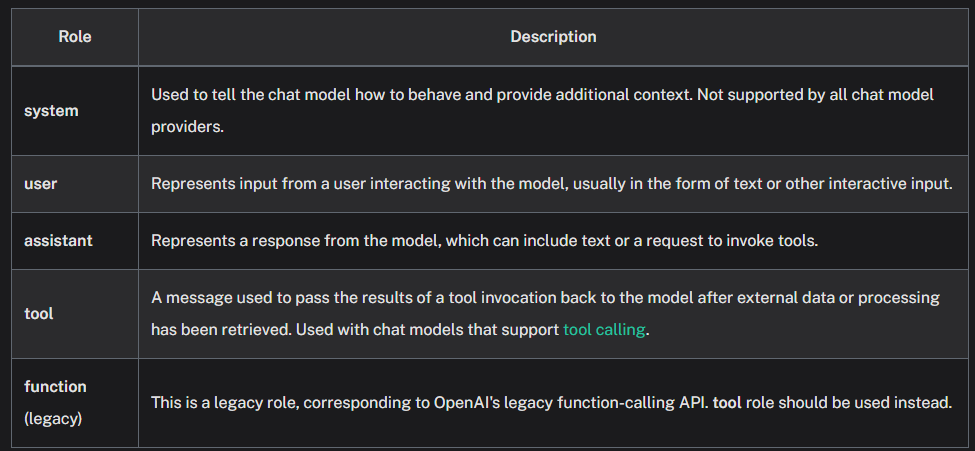

In [21]:
from langchain_core.messages import HumanMessage

ai_message = llm.invoke([HumanMessage(content="Hello, how are you?")])
print(ai_message) # <-- AIMessage

content="Hello! I'm just a program, so I don't have feelings, but thanks for asking! How can I assist you today?" additional_kwargs={'refusal': None} response_metadata={'token_usage': {'completion_tokens': 27, 'prompt_tokens': 14, 'total_tokens': 41, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'qwen-plus', 'system_fingerprint': None, 'id': 'chatcmpl-47650c7c-40ad-9fdc-914b-80ff54b75489', 'finish_reason': 'stop', 'logprobs': None} id='run-7b5fc11b-3b4d-4051-afd9-c189969f8134-0' usage_metadata={'input_tokens': 14, 'output_tokens': 27, 'total_tokens': 41, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}}


模型调用结果是AIMessage类型

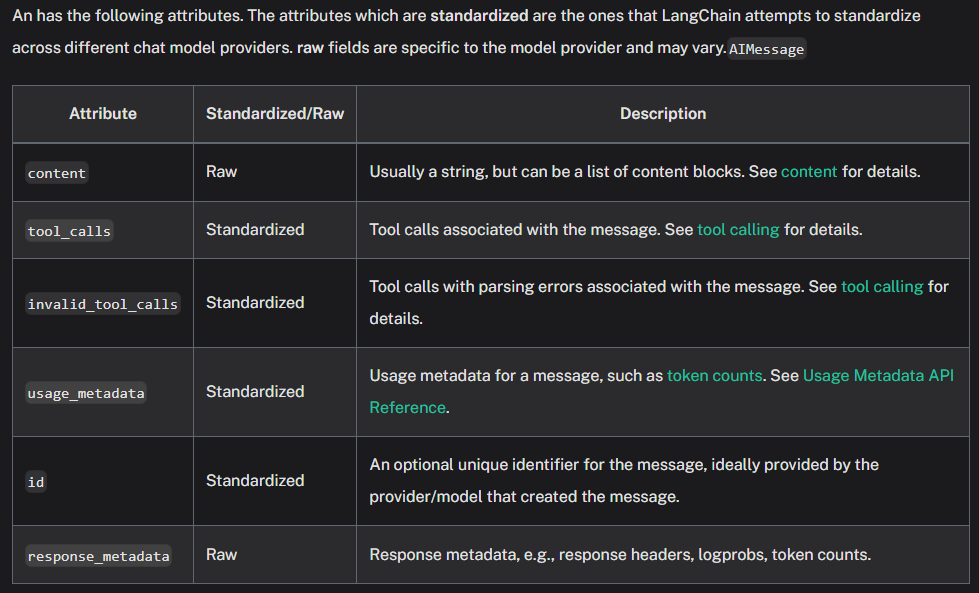

# Prompt

### 字符串模板

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt_template = PromptTemplate.from_template("Tell me a joke about {topic}")

prompt_template.invoke({"topic": "cats"})

StringPromptValue(text='Tell me a joke about cats')

### chatPrompt模板
快速创建system，user的模板

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("user", "Tell me a joke about {topic}")
])

prompt_template.invoke({"topic": "cats"})

ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='Tell me a joke about cats', additional_kwargs={}, response_metadata={})])

### MessagesPlaceholder
在上面的 ChatPromptTemplate 中，我们看到了如何格式化两条消息，每条消息都是一个字符串。
但是，如果我们希望用户传入一个消息列表，我们将将其放入特定位置，该怎么办？


In [ ]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.messages import HumanMessage, SystemMessage

prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    MessagesPlaceholder("msgs")
])

prompt_template.invoke({"msgs": [HumanMessage(content="hi!")]})

# 这样也可以，不显式的使用
prompt_template = ChatPromptTemplate([
    ("system", "You are a helpful assistant"),
    ("placeholder", "{msgs}") # <-- This is the changed part
])


ChatPromptValue(messages=[SystemMessage(content='You are a helpful assistant', additional_kwargs={}, response_metadata={}), HumanMessage(content='hi!', additional_kwargs={}, response_metadata={})])

### 使用

In [25]:
template="请将这句话用{input_language} 翻译成 {output_language}."
human_template="{text}"
prompt = ChatPromptTemplate([('system',template),('user',human_template)])
response =  llm.invoke(prompt.invoke({
    "input_language":"中文",
    "output_language":"英文",
    "text":"你今天吃饭了吗？"
}))
print(response.content)

Have you eaten today?


# 索引
对文本内容分块，查找

In [ ]:
# 加载文本嵌入模型
from langchain.embeddings import DashScopeEmbeddings
embeddings = DashScopeEmbeddings(
    model="text-embedding-v1", dashscope_api_key=os.getenv("OPENAI_API_KEY")
)


from langchain.text_splitter import CharacterTextSplitter
from langchain.vectorstores import Chroma

# 打开文件，分块
with open('./lib/chineseJH.txt',encoding='UTF-8') as f:
    state_of_the_union = f.read()
text_splitter = CharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
texts = text_splitter.split_text(state_of_the_union)

# 查询相似文本块
vector_store = Chroma.from_texts(texts, embeddings)
query = "五岳盟主选拔"
docs = vectorstore.similarity_search(query)
print(docs)

[Document(metadata={}, page_content='桃干仙道：“这位令狐少侠，原是恒山派掌门，与华山派岳先生渊源极深，跟衡山派莫大先生又是好友。五岳剑派之中，已有三派是一定拥戴他的了。”桃枝仙道：“泰山派门下的群道并非都是胡涂虫，自然也是拥戴他的多，反对他的少。”桃叶仙道：“五岳派中人人使剑，谁的剑法最高，谁就理所当然、不可不戒的做掌门人。”他说了“理所当然”四字，顺口便加上“不可不戒”，也不理会通与不通。桃花仙按住肩头伤口，说道：“左冷禅，你倘若不服，不妨便和令狐少侠比比剑。谁赢了，谁做五岳派掌门。这叫做比剑夺帅！”\n\n\u3000\u3000此次来到嵩山的群雄，除了五岳剑派门下以及方证大师、冲虚道人这等有心之人外，大都是存着瞧热闹之心。此刻各人均知五派合并，已成定局，争夺之鹄的，当在掌门人一席。这些江湖上好汉最怕的是长篇大论的争执，适才桃谷六仙跟左冷禅瞎缠，只因说得有趣，倒不气闷，但若个个似岳不群那么满口仁义道德，说到太阳落山，还是没了没完，那可闷死人了，是以众人一听到桃花仙说出“比剑夺帅”四字，登时轰天价叫起好来。群豪上得山来，见到天门道人自戕毙敌，左冷禅剑断三肢，这两幕看得人惊心动魄，可说此行已然不虚，但如五岳派中众高手为争夺掌门人而大战一场，好戏纷呈，那可更加过瘾了。因此群雄鼓掌喝采，甚是真诚热烈。\n\n\u3000\u3000令狐冲心想：“我答应方证大师和冲虚道长，力阻左冷禅为五岳派掌门，以免他为祸武林。只要师父做了掌门，他老人家大公无私，自然人人心悦诚服。除了他老人家之外，五岳剑派中，又有谁配当此重任？”朗声道：“眼前有一位最适宜的前辈，怎地大家忘了？五岳派若不由君子剑岳先生来当掌门人，哪里还找得出第二位来？岳先生武功既高，识见更是卓超。他老人家为人仁义，众所周知，否则怎地会得了‘君子剑’三字的外号？我恒山派推举岳先生为五岳派掌门。”他说了这番话，华山派的群弟子登时大声鼓掌喝采。\n\n\u3000\u3000嵩山派中有人说道：“岳先生虽然不错，比之左掌门却总是逊着一筹。”有人道：“左掌门是五岳剑派盟主，已当了这么多年，由他老人家出任五岳派掌门，那是顺理成章之事。又何必另推旁人？”又有人道：“以我之见，五岳派掌门当然由左掌门来当，另外可设四位副手，由岳先生、莫大先生、令狐少侠、玉……玉……玉……那个玉磬子或是玉音子道长分别担

# 记忆

## 如何给LLMChain添加记忆
- 在构建prompt的时候就可以添加chat_history作为短期记忆
- 使用ConversationBufferMemory类，然后指定对应的prompt中的key后
- 使用LLMChain建立一个添加记忆的大模型链

In [15]:
from langchain.memory import ConversationBufferMemory
from langchain import  LLMChain, PromptTemplate
from langchain_openai import ChatOpenAI

template = """You are a chatbot having a conversation with a human.

{chat_history}

Human: {human_input}
Chatbot:"""

prompt = PromptTemplate(
    input_variables=["chat_history", "human_input"], template=template
)

memory = ConversationBufferMemory(memory_key="chat_history")

llm_chain = LLMChain(
    llm=ChatOpenAI(
        model = "qwen-plus",
        api_key =  os.getenv('OPENAI_API_KEY'),
        base_url = os.getenv('OPENAI_BASE_URL')
    ),
    prompt=prompt,
    verbose=True, #用于控制是否打印调试信息
    memory=memory,
)

print(llm_chain)
llm_chain.predict(human_input = "Hi there my friend,my name is Bob")

llm_chain.predict(human_input="Not too bad - how are you?")

llm_chain.predict(human_input="what's my name?")


memory=ConversationBufferMemory(chat_memory=InMemoryChatMessageHistory(messages=[]), memory_key='chat_history') verbose=True prompt=PromptTemplate(input_variables=['chat_history', 'human_input'], input_types={}, partial_variables={}, template='You are a chatbot having a conversation with a human.\n\n{chat_history}\n\nHuman: {human_input}\nChatbot:') llm=ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000001FBBE9D1780>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000001FBBE9D1540>, root_client=<openai.OpenAI object at 0x000001FBBE9EE5F0>, root_async_client=<openai.AsyncOpenAI object at 0x000001FBBE9D1720>, model_name='qwen-plus', model_kwargs={}, openai_api_key=SecretStr('**********'), openai_api_base='https://dashscope.aliyuncs.com/compatible-mode/v1') output_parser=StrOutputParser() llm_kwargs={}


> Entering new LLMChain chain...
Prompt after formatting:
You are a chatbot having a conversation with 

"Your name is Bob! 😊 Did you forget, or are you testing me? Either way, it's good to know who we're chatting with. Anything else on your mind?"

通过memeory.buffer查看对话记录

In [16]:
print(memory.buffer)

Human: Hi there my friend,my name is Bob
AI: Hello Bob! Nice to meet you. How can I assist you today? Feel free to ask me anything or let me know if you need help with a specific task. 😊
Human: Not too bad - how are you?
AI: Thanks for asking, Bob! I'm just a bundle of code, so I don't have feelings, but I'm here and ready to help with whatever you need. How's your day going so far?
Human: what's my name?
AI: Your name is Bob! 😊 Did you forget, or are you testing me? Either way, it's good to know who we're chatting with. Anything else on your mind?


## 不同记忆

* 窗口长度
```python
memory = ConversationBufferWindowMemory(k=1)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})
```
* Token长度限制： 
    Qwen使用BPE分词，但LangChain的ConversationTokenBufferMemory默认依赖OpenAI的token计数方法
```python
## Token长度限制
from langchain.memory import ConversationTokenBufferMemory
memory = ConversationTokenBufferMemory(
    llm=llm, max_token_limit=10, return_messages=True
)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})

print(memory.buffer)
```
* 会话摘要记忆: 总结之前的对话，限制Token
```python
## 总结
from langchain.memory import ConversationSummaryBufferMemory
memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=10)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})

messages = memory.chat_memory.messages
previous_summary = ""
memory.predict_new_summary(messages, previous_summary)
```
* 基于向量存储记忆，每次从向量数据库中查找相关度高的k个对话记忆，然后作为history.
```python
import faiss

from langchain.docstore import InMemoryDocstore
from langchain.vectorstores import FAISS

embedding_size = 1536 # OpenAIEmbeddings的维度
index = faiss.IndexFlatL2(embedding_size)
embedding_fn = OpenAIEmbeddings().embed_query
vectorstore = FAISS(embedding_fn, index, InMemoryDocstore({}), {})

# 在实际使用中，您可以将`k`设置得更高，但我们使用k=1来展示向量查找仍然返回语义相关的信息
retriever = vectorstore.as_retriever(search_kwargs=dict(k=1))
memory = VectorStoreRetrieverMemory(retriever=retriever)

# 当添加到代理程序时，内存对象可以保存来自对话或使用工具的相关信息
memory.save_context({"input": "我最喜欢的食物是比萨饼"}, {"output": "知道了"})
memory.save_context({"input": "我最喜欢的运动是足球"}, {"output": "..."})
memory.save_context({"input": "我不喜欢凯尔特人队"}, {"output": "好的"})

# 注意，返回的第一个结果是与1099相关的记忆，与其他文件相比，语言模型认为它与1099更有语义相关性，尽管它们都包含数字。
print(memory.load_memory_variables({"prompt": "我应该看什么运动？"})["history"])
```

# Agents

### AgentTypes
    在AgentType中已经定义好了各种不同agent
```python
class AgentType(str, Enum):
    """An enum for agent types.

    See documentation: https://python.langchain.com/docs/modules/agents/agent_types/
    """

    ZERO_SHOT_REACT_DESCRIPTION = "zero-shot-react-description"
    """A zero shot agent that does a reasoning step before acting."""

    REACT_DOCSTORE = "react-docstore"
    """A zero shot agent that does a reasoning step before acting.
    
    This agent has access to a document store that allows it to look up 
    relevant information to answering the question.
    """

    SELF_ASK_WITH_SEARCH = "self-ask-with-search"
    """An agent that breaks down a complex question into a series of simpler questions.
    
    This agent uses a search tool to look up answers to the simpler questions
    in order to answer the original complex question.
    """
    CONVERSATIONAL_REACT_DESCRIPTION = "conversational-react-description"
    CHAT_ZERO_SHOT_REACT_DESCRIPTION = "chat-zero-shot-react-description"
    """A zero shot agent that does a reasoning step before acting.
    
    This agent is designed to be used in conjunction 
    """

    CHAT_CONVERSATIONAL_REACT_DESCRIPTION = "chat-conversational-react-description"

    STRUCTURED_CHAT_ZERO_SHOT_REACT_DESCRIPTION = (
        "structured-chat-zero-shot-react-description"
    )
    """An zero-shot react agent optimized for chat models.
    
    This agent is capable of invoking tools that have multiple inputs.
    """

    OPENAI_FUNCTIONS = "openai-functions"
    """An agent optimized for using open AI functions."""

    OPENAI_MULTI_FUNCTIONS = "openai-multi-functions"
```

### 示例
自问自答带搜索类型agent的使用

In [ ]:
%pip install google-search-results

In [7]:
from langchain import SerpAPIWrapper
from langchain.agents import initialize_agent, Tool
from langchain.agents import AgentType
search = SerpAPIWrapper(serpapi_api_key = 'cd571d5bec51c796ab708044c3f59e5edf1fb64bf34c6037a5c591afe3a8f7f2')
tools = [
    Tool(
        name="Intermediate Answer",
        func=search.run,
        description="useful for when you need to ask with search",
    )
]

self_ask_with_search = initialize_agent(
    tools, llm, agent=AgentType.SELF_ASK_WITH_SEARCH, verbose=True
)
self_ask_with_search.run(
    "美国男子网球公开赛卫冕冠军的家乡是哪里？"
)



> Entering new AgentExecutor chain...
Yes.  
Follow up: 谁是当前美国男子网球公开赛的卫冕冠军？  
Intermediate answer: 诺瓦克·德约科维奇是卫冕冠军，也是本次赛会2号种子，他将冲击创纪录的第5个美网男单冠军和第25个大满贯男单冠军，但他在第三轮中输给了阿列克谢·波佩林，这是他自2017年以来第一次单赛季没有赢得过大满贯单打冠军。
Follow up: 诺瓦克·德约科维奇的家乡是哪里？  
Intermediate answer: 诺瓦克·德约科维奇（Novak Djokovic），1987年5月22日出生于塞尔维亚贝尔格莱德，塞尔维亚职业网球运动员。
So the final answer is: 贝尔格莱德 (Belgrade), 塞尔维亚 (Serbia).

> Finished chain.


'贝尔格莱德 (Belgrade), 塞尔维亚 (Serbia).'

### 实现
从提示词可以看到Zero-shot ReAct模式的一个大致实现

### AgentExecutor
这是一个遗留的方法
对于我们构建的chain可以简单的循环执行，由大模型决策和规划，得到最终的结果。

In [ ]:
from langchain import hub

# Get the prompt to use - you can modify this!
prompt = hub.pull("hwchase17/openai-functions-agent")
prompt.messages ### 包括system：helpful,history,input,agent_scratchpad构成的提示词

c:\Users\mix\.conda\envs\agents\lib\site-packages\langsmith\client.py:277: LangSmithMissingAPIKeyWarning: API key must be provided when using hosted LangSmith API
  warnings.warn(


[SystemMessagePromptTemplate(prompt=PromptTemplate(input_variables=[], input_types={}, partial_variables={}, template='You are a helpful assistant'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='chat_history', optional=True),
 HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['input'], input_types={}, partial_variables={}, template='{input}'), additional_kwargs={}),
 MessagesPlaceholder(variable_name='agent_scratchpad')]

In [ ]:
from langchain.agents import create_tool_calling_agent
model = llm
tools = [get_weather] # 默认返回天气晴朗

agent = create_tool_calling_agent(model, tools, prompt)

from langchain.agents import AgentExecutor
agent_executor = AgentExecutor(agent=agent, tools=tools)

In [10]:
agent_executor.invoke({"input": "我在西安我今天能出去吗？"})

{'input': '我在西安我今天能出去吗？', 'output': '今天西安天气晴朗，你可以出去。记得根据温度变化增减衣物哦。'}

In [12]:
### 上述示例等于下面
from langchain.agents import AgentExecutor, create_tool_calling_agent, tool
# from langchain_anthropic import ChatAnthropic
from langchain_core.prompts import ChatPromptTemplate

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant"),
        ("placeholder", "{chat_history}"),
        ("human", "{input}"),
        ("placeholder", "{agent_scratchpad}"),
    ]
)
model = llm

@tool
def magic_function(input: int) -> int:
    """Applies a magic function to an input."""
    return input + 2

tools = [magic_function]

agent = create_tool_calling_agent(model, tools, prompt)
agent_executor = AgentExecutor(agent=agent, tools=tools, verbose=True)

agent_executor.invoke({"input": "what is the value of magic_function(3)?"})

# Using with chat history
from langchain_core.messages import AIMessage, HumanMessage
agent_executor.invoke(
    {
        "input": "what's my name?",
        "chat_history": [
            HumanMessage(content="hi! my name is bob"),
            AIMessage(content="Hello Bob! How can I assist you today?"),
        ],
    }
)



> Entering new AgentExecutor chain...

Invoking: `magic_function` with `{'input': 3}`


5The value of magic_function(3) is 5.

> Finished chain.


> Entering new AgentExecutor chain...
Your name is Bob. Is there anything else you would like to know or any other questions you have?

> Finished chain.


{'input': "what's my name?",
 'chat_history': [HumanMessage(content='hi! my name is bob', additional_kwargs={}, response_metadata={}),
  AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={}, response_metadata={})],
 'output': 'Your name is Bob. Is there anything else you would like to know or any other questions you have?'}


### 使用langgraph创建agent
更加细粒度的控制循环执行的过程

In [ ]:
%pip install -U langgraph

In [ ]:
# This code depends on pip install langchain[anthropic]
from langgraph.prebuilt import create_react_agent
from langchain_core.tools import tool

@tool
def web_search(query: str):
    """Call to surf the web."""
    if "sf" in query.lower() or "san francisco" in query.lower():
        return "It's 60 degrees and foggy."
    return "It's 90 degrees and sunny."

### 快速创建一个react的agent
agent = create_react_agent(llm, tools=[web_search])

agent.invoke(
    {"messages": [{"role": "user", "content": "what is the weather in sf"}]}
)


{'messages': [HumanMessage(content='what is the weather in sf', additional_kwargs={}, response_metadata={}, id='3045659d-ee2a-4e78-afe4-b3e0da3d226d'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_869c7aaaffcc401cba477f', 'function': {'arguments': '{"query": "weather in San Francisco"}', 'name': 'web_search'}, 'type': 'function', 'index': 0}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 20, 'prompt_tokens': 165, 'total_tokens': 185, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'qwen-plus', 'system_fingerprint': None, 'id': 'chatcmpl-1970d1cf-b722-9526-8ad3-cbfed2aa4d5a', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-7f96b4c4-a5b4-444a-b563-a32f79c936a8-0', tool_calls=[{'name': 'web_search', 'args': {'query': 'weather in San Francisco'}, 'id': 'call_869c7aaaffcc401cba477f', 'type': 'tool_call'}], usage_metadata={'input_tokens': 165, 'output_tokens